In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [4]:
df = pd.read_csv("telcom_customer_churn.csv")

In [5]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7028,0,72,103.20,7362.90,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7029,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7030,1,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [120]:
df.corr()["Churn"]

SeniorCitizen                            0.150541
tenure                                  -0.354049
MonthlyCharges                           0.192858
TotalCharges                            -0.199484
Churn                                    1.000000
gender_Male                             -0.008545
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
PhoneService_Yes                         0.011691
MultipleLines_No phone service          -0.011691
MultipleLines_Yes                        0.040033
InternetService_Fiber optic              0.307463
InternetService_No                      -0.227578
OnlineSecurity_No internet service      -0.227578
OnlineSecurity_Yes                      -0.171270
OnlineBackup_No internet service        -0.227578
OnlineBackup_Yes                        -0.082307
DeviceProtection_No internet service    -0.227578
DeviceProtection_Yes                    -0.066193
TechSupport_No internet service         -0.227578


In [28]:
df["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [6]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [9]:
X = df.drop("Churn",axis=1)
y = df["Churn"]

# Train Test Spliting

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.7,random_state=50)

In [18]:
X_train.shape

(4922, 30)

In [19]:
X_test.shape

(2110, 30)

# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion="gini",ccp_alpha=0.0004)
model1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0004)

In [74]:
y_pred = model1.predict(X_test)


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy_score(y_test,y_pred)

0.7843601895734598

In [76]:
confusion_matrix(y_test,y_pred)

array([[1344,  217],
       [ 238,  311]], dtype=int64)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1561
           1       0.59      0.57      0.58       549

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.72      2110
weighted avg       0.78      0.78      0.78      2110



# Pruning concept

In [29]:
path = model1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impuritites = path.ccp_alphas, path.impurities

In [44]:
ccp_alpha = []
for i in ccp_alphas:
    if i<0.002:
        ccp_alpha.append(i)

In [45]:
import matplotlib.pyplot as plt

In [46]:
from sklearn.tree import DecisionTreeClassifier

acc_test = []
acc_train = []

for i in ccp_alpha:
    
    dt_model = DecisionTreeClassifier(criterion="gini",ccp_alpha=i)
    dt_model.fit(X_train,y_train)
    p1 = dt_model.predict(X_test)
    r1 = accuracy_score(y_test,p1)
    acc_test.append(r1)

    p2 = dt_model.predict(X_train)
    r2 = accuracy_score(y_train,p2)
    acc_train.append(r2)

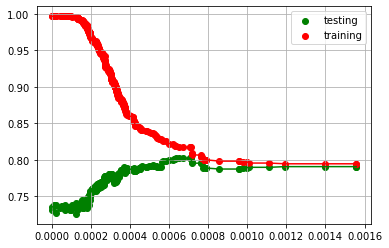

In [47]:
plt.scatter(ccp_alpha,acc_test,color="green",label="testing")
plt.plot(ccp_alpha,acc_test,color="green")

plt.scatter(ccp_alpha,acc_train,color="red",label="training")
plt.plot(ccp_alpha,acc_train,color="red")
plt.legend()
plt.grid()
plt.show()

# Model Creation: Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(ccp_alpha=0.0004,n_estimators=50,random_state=0)
model2.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0004, n_estimators=50, random_state=0)

In [114]:
y_pred2 = model2.predict(X_test)

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy_score(y_test,y_pred2)

0.8156398104265403

In [116]:
confusion_matrix(y_test,y_pred2)

array([[1431,  130],
       [ 259,  290]], dtype=int64)

In [117]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1561
           1       0.69      0.53      0.60       549

    accuracy                           0.82      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.81      0.82      0.81      2110



# Model Creation: AdaBoosting

In [127]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(base_estimator=model1)
model3.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0004))

In [128]:
y_pred3 = model3.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy_score(y_test,y_pred3)

0.7388625592417062

In [130]:
confusion_matrix(y_test,y_pred3)

array([[1293,  268],
       [ 283,  266]], dtype=int64)

In [131]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1561
           1       0.50      0.48      0.49       549

    accuracy                           0.74      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.74      0.74      0.74      2110



# Model creation: Gradient Boosting

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(n_estimators=50,ccp_alpha=0.0004,random_state=0)
model4.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0004, n_estimators=50, random_state=0)

In [140]:
y_pred4 = model4.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy_score(y_test,y_pred4)

0.8113744075829384

In [143]:
confusion_matrix(y_test,y_pred4)

array([[1431,  130],
       [ 268,  281]], dtype=int64)

In [142]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1561
           1       0.68      0.51      0.59       549

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



# XGboost

In [144]:
#!pip install xgboost

In [145]:
import xgboost
from xgboost import XGBClassifier

In [146]:
xg_model = XGBClassifier()
xg_model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:
y_pred5 = xg_model.predict(X_test)

In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy_score(y_test,y_pred5)

0.7919431279620853

In [150]:
confusion_matrix(y_test,y_pred4)

array([[1431,  130],
       [ 268,  281]], dtype=int64)

In [151]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1561
           1       0.68      0.51      0.59       549

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110

